**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: Armando Cerda De La Rosa
*   MATRÍCULA: A01570376   

---

En esta actividad usarás el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire:

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)
*   Calcula el porcentaje de valores faltantes por columna.

In [1]:
!pip install pandas
!pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
air_df = pd.read_csv('LaqnData.csv')

In [3]:
air_df.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R
3,CT3,NO,01/01/2017 03:00,2.1,ug m-3,R
4,CT3,NO,01/01/2017 04:00,3.3,ug m-3,R


In [4]:
air_df.shape

(43800, 6)

In [5]:
air_df.columns

Index(['Site', 'Species', 'ReadingDateTime', 'Value', 'Units',
       'Provisional or Ratified'],
      dtype='object')

In [6]:
air_df.dtypes

Site                        object
Species                     object
ReadingDateTime             object
Value                      float64
Units                       object
Provisional or Ratified     object
dtype: object

In [7]:
import random
ex1, ex2, ex3 = random.sample(range(len(air_df)), 3)

print("Dataframe total rows: ", len(air_df))
df_info = pd.DataFrame(data = air_df.dtypes)
missing_values_total = air_df.isnull().sum()
missing_values_percent = round(missing_values_total/len(air_df)*100,2).astype(str)+" %"

pd.concat([df_info[0].rename("Data Type"),\
           air_df.T[ex1].rename("Example 1"),\
           air_df.T[ex2].rename("Example 2"),\
           air_df.T[ex3].rename("Example 3"),\
           missing_values_total.rename("Total Not Missing"), \
           missing_values_percent.rename("% of missing values")], axis=1)

Dataframe total rows:  43800


,Data Type,Example 1,Example 2,Example 3,Total Not Missing,% of missing values
Site,object,CT3,CT3,CT3,0,0.0 %
Species,object,PM2.5,PM2.5,NO2,0,0.0 %
ReadingDateTime,object,18/01/2017 02:00,16/02/2017 20:00,08/10/2017 19:00,0,0.0 %
Value,float64,22.0,16.0,57.9,3230,7.37 %
Units,object,ug m-3,ug m-3,ug m-3,0,0.0 %
Provisional or Ratified,object,R,R,R,0,0.0 %


2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:


*   ¿Cuántas mediciones se hicieron?
*   ¿Cuántos contaminantes del aire (`Species`) se analizaron?
*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.
*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

In [8]:

# a. ¿Cuántas mediciones se hicieron?
mediciones_realizadas = air_df['ReadingDateTime'].nunique()
print(f"Número de mediciones realizadas: {mediciones_realizadas}")

# b. ¿Cuántos contaminantes del aire (`Species`) se analizaron?
contaminantes_analizados = air_df['Species'].nunique()
print(f"Número de contaminantes del aire analizados: {contaminantes_analizados}")

# c. ¿Qué columnas no agregan ningún valor informativo porque tienen el mismo valor en todo el conjunto de datos?
# Dichas columnas tendrán un conteo único de 1.
valores_unicos_por_columna = air_df.nunique()
columnas_no_informativas = valores_unicos_por_columna[valores_unicos_por_columna == 1].index.tolist()
print(f"Columnas no informativas: {columnas_no_informativas}")

# Eliminar esas columnas del dataframe
air_df = air_df.drop(columns=columnas_no_informativas)

# d. La columna `Units` tampoco tiene valor informativo.
# Para verificar esto, verifica sus valores únicos con `unique()`
unidades_unicas = air_df['Units'].unique()
print(f"Valores únicos en la columna 'Units': {unidades_unicas}")

# Elimina la columna `Units` del dataframe ya que no proporciona valor informativo.
air_df = air_df.drop(columns='Units')

# Muestra el dataframe actualizado (si es necesario)
print(air_df.head())


Número de mediciones realizadas: 8760
Número de contaminantes del aire analizados: 5
Columnas no informativas: ['Site', 'Provisional or Ratified']
Valores únicos en la columna 'Units': ['ug m-3' 'ug m-3 as NO2' 'ug/m3']
  Species   ReadingDateTime  Value
0      NO  01/01/2017 00:00    3.5
1      NO  01/01/2017 01:00    3.6
2      NO  01/01/2017 02:00    2.2
3      NO  01/01/2017 03:00    2.1
4      NO  01/01/2017 04:00    3.3


3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.

In [9]:
air_df["Species"].value_counts()

Species
NO       8760
NO2      8760
NOX      8760
PM10     8760
PM2.5    8760
Name: count, dtype: int64

Sí, coinciden los totales

4.	Utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

In [10]:
air_df.groupby("Species").mean("Value")

,Value
Species,
NO,15.045115
NO2,38.010185
NOX,61.078661
PM10,22.551704
PM2.5,14.999831


5.	El conjunto de datos está en un formato largo. Aplique la función apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

In [11]:
pvt_df = air_df.pivot(index='ReadingDateTime', columns='Species', values='Value')
pvt_df

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
01/01/2017 00:00,3.5,30.8,36.2,35.7,NaN
01/01/2017 01:00,3.6,31.5,37.0,28.5,NaN
01/01/2017 02:00,2.2,27.3,30.7,22.7,NaN
01/01/2017 03:00,2.1,23.5,26.8,20.5,NaN
01/01/2017 04:00,3.3,28.0,33.0,22.1,NaN
...,...,...,...,...,...
31/12/2017 19:00,0.7,17.5,18.5,16.3,-2.0
31/12/2017 20:00,0.7,17.5,18.6,14.5,6.0
31/12/2017 21:00,0.7,14.1,15.1,8.6,5.0


6.	A través de la función `describe()` responde:

*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?
*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece?
*   ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta?
*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?

In [12]:
desc = pvt_df.describe()

# a. ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?
max_no2 = desc.loc['max', 'NO2']
date_max_no2 = pvt_df[pvt_df['NO2'] == max_no2].index[0]

# b. ¿Cuál es el menor valor de `PM10` registrado? ¿A qué día pertenece?
min_pm10 = desc.loc['min', 'PM10']
date_min_pm10 = pvt_df[pvt_df['PM10'] == min_pm10].index[0]

# c. ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta?
median_no = desc.loc['50%', 'NO']
interpretation_median = """
La mediana representa el valor medio cuando se ordenan todas las observaciones de NO.
Es el valor que separa la mitad superior de los datos de la mitad inferior. Esto significa que el 50% 
de las mediciones son inferiores a este valor y el 50% restante son superiores a este valor.
"""

# d. ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?
q1_pm25 = desc.loc['25%', 'PM2.5']
interpretation_q1 = """
El primer cuartil (Q1) es el valor por debajo del cual se encuentra el 25% de los datos.
Esto significa que el 25% de todas las mediciones de PM2.5 son inferiores a este valor.
"""

print(f"El mayor valor de NO2 registrado es {max_no2} y pertenece al día {date_max_no2}.")
print(f"El menor valor de PM10 registrado es {min_pm10} y pertenece al día {date_min_pm10}.")
print(f"La mediana de NO es {median_no}.\nInterpretación: {interpretation_median}")
print(f"El primer cuartil de PM2.5 es {q1_pm25}.\nInterpretación: {interpretation_q1}")


El mayor valor de NO2 registrado es 120.2 y pertenece al día 24/01/2017 19:00.
El menor valor de PM10 registrado es -5.6 y pertenece al día 12/09/2017 23:00.
La mediana de NO es 7.1.
Interpretación: 
La mediana representa el valor medio cuando se ordenan todas las observaciones de NO.
Es el valor que separa la mitad superior de los datos de la mitad inferior. Esto significa que el 50% 
de las mediciones son inferiores a este valor y el 50% restante son superiores a este valor.

El primer cuartil de PM2.5 es 7.0.
Interpretación: 
El primer cuartil (Q1) es el valor por debajo del cual se encuentra el 25% de los datos.
Esto significa que el 25% de todas las mediciones de PM2.5 son inferiores a este valor.



7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad?

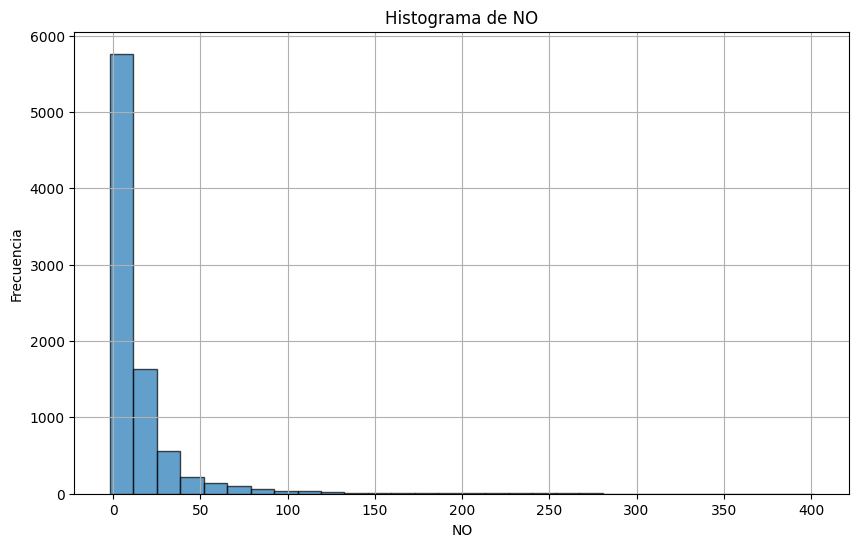

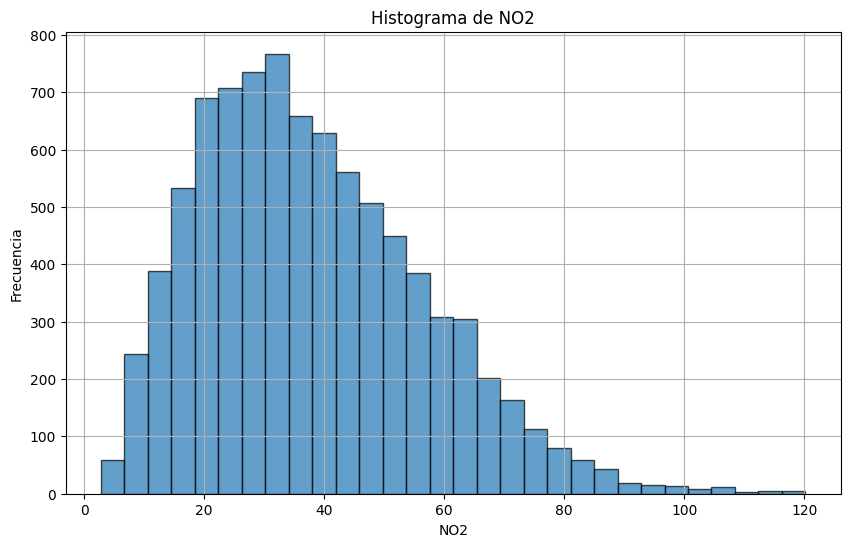

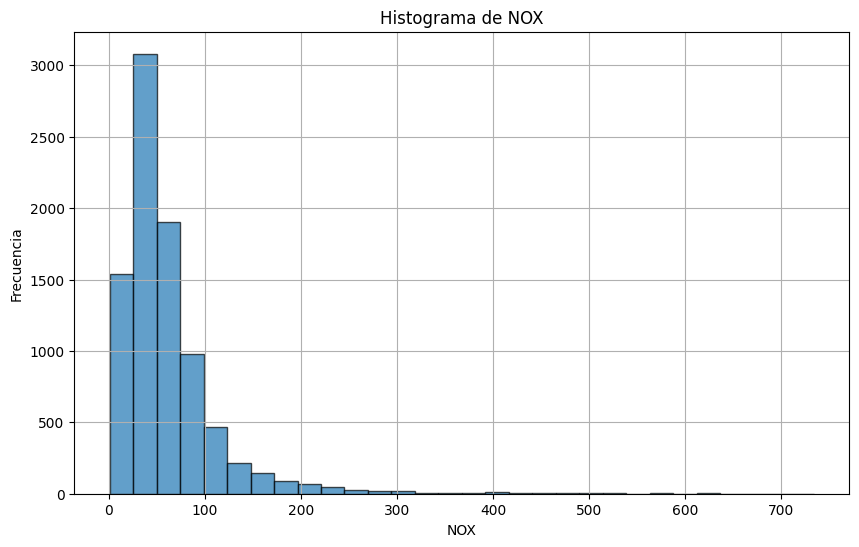

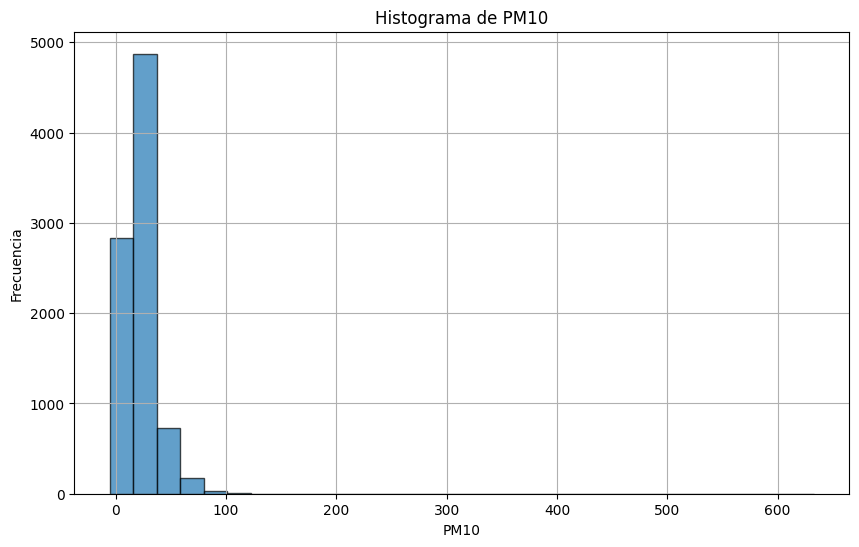

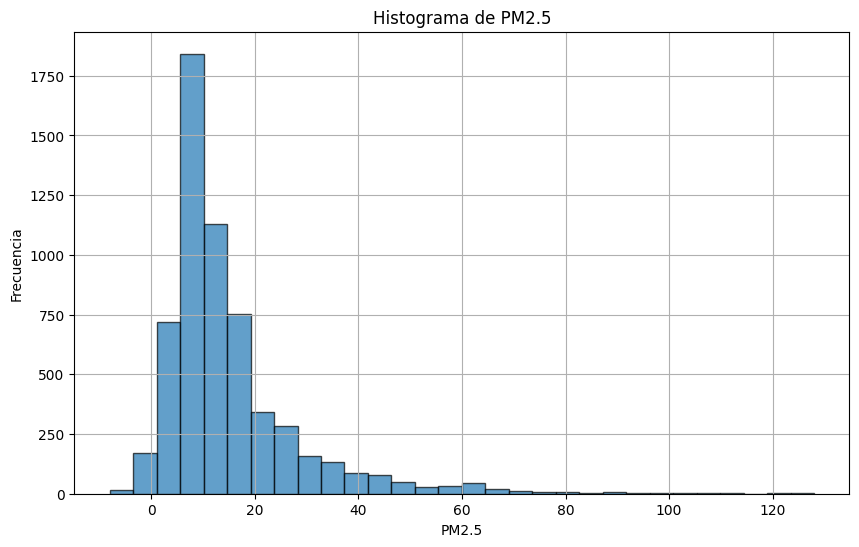

El contaminante con la mayor variabilidad es NOX con una desviación estándar de 54.58.


In [13]:
import matplotlib.pyplot as plt

# Dibujar histogramas
for col in pvt_df.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(pvt_df[col].dropna(), bins=30, edgecolor='k', alpha=0.7)  # Excluir valores NaN con dropna()
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

# Determinar qué contaminante tiene mayor variabilidad usando desviación estándar
std_devs = pvt_df.std()
most_variable_contaminant = std_devs.idxmax()

print(f"El contaminante con la mayor variabilidad es {most_variable_contaminant} con una desviación estándar de {std_devs[most_variable_contaminant]:.2f}.")


8.	Ejecuta el siguiente código y comenta qué hace cada línea:

In [14]:
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True)
datetime_df.columns = ['Date','Time']
datetime_df
date_df = datetime_df.Date.str.split('/',expand=True)
date_df.columns = ['Day','Month','Year']
date_df
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year'])
air_df = air_df.set_index(['Month','Day','Time','Species'])
air_df

Value
Month Day Time  Species       
01    01  00:00 NO         3.5
          01:00 NO         3.6
          02:00 NO         2.2
          03:00 NO         2.1
          04:00 NO         3.3
...                        ...
12    31  19:00 PM2.5     -2.0
          20:00 PM2.5      6.0
          21:00 PM2.5      5.0
          22:00 PM2.5      5.0
          23:00 PM2.5      6.0

[43800 rows x 1 columns]

1. datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True)
- Esta línea divide la columna 'ReadingDateTime' del dataframe 'air_df' en dos partes utilizando el espacio como delimitador. El resultado es un nuevo dataframe llamado 'datetime_df' que tiene dos columnas: una para la fecha y otra para la hora.

2. datetime_df.columns = ['Date','Time']
- Aquí se están renombrando las columnas del dataframe 'datetime_df' a 'Date' y 'Time' para representar más claramente su contenido.

3. date_df = datetime_df.Date.str.split('/',expand=True)
- Esta línea toma la columna 'Date' del dataframe 'datetime_df' y la divide nuevamente, esta vez utilizando el carácter '/' como delimitador. Esto se hace porque se espera que la fecha esté en un formato del tipo día/mes/año. El resultado es otro dataframe llamado 'date_df' que tiene tres columnas para el día, el mes y el año, respectivamente.

4. date_df.columns = ['Day','Month','Year']
- Estás asignando nombres a las columnas del dataframe 'date_df', específicamente 'Day', 'Month' y 'Year'.

5. air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year'])
- Aquí estás combinando los dataframes 'air_df', 'date_df' y 'datetime_df' en uno solo. Primero, unes 'air_df' con 'date_df' para agregar las columnas de día, mes y año. Luego, unes la columna 'Time' de 'datetime_df'. Finalmente, eliminas las columnas 'ReadingDateTime' y 'Year' porque ya no son necesarias o son redundantes.

6. air_df = air_df.set_index(['Month','Day','Time','Species'])
- En esta última línea, estás reorganizando el dataframe 'air_df' para que tenga un índice jerárquico. El nuevo índice se compone de las columnas 'Month', 'Day', 'Time' y 'Species'. Esto puede ser útil para realizar análisis más específicos o para mejorar el rendimiento de ciertas operaciones.


9. Ejecuta la siguiente instrucción y compara su salida con la del código anterior (ejercicio 8). ¿Son iguales?

In [15]:
air_df.unstack()

Value                        
Species            NO   NO2   NOX  PM10 PM2.5
Month Day Time                               
01    01  00:00   3.5  30.8  36.2  35.7   NaN
          01:00   3.6  31.5  37.0  28.5   NaN
          02:00   2.2  27.3  30.7  22.7   NaN
          03:00   2.1  23.5  26.8  20.5   NaN
          04:00   3.3  28.0  33.0  22.1   NaN
...               ...   ...   ...   ...   ...
12    31  19:00   0.7  17.5  18.5  16.3  -2.0
          20:00   0.7  17.5  18.6  14.5   6.0
          21:00   0.7  14.1  15.1   8.6   5.0
          22:00   1.1  22.0  23.6  12.5   5.0
          23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]

10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()/unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()/unstack()`, ¿cuál elegirías? ¿Por qué?

Nivel de operación:

melt() y pivot(): Operan principalmente a nivel de DataFrame, permitiendo transformar entre formatos largos y anchos.
stack() y unstack(): Operan a nivel de series y dataframes multi-índice, permitiendo mover entre niveles de índice y columnas.
Uso principal:

melt(): Convierte un DataFrame de formato ancho a largo.
pivot(): Convierte un DataFrame de formato largo a ancho.
stack(): "Apila" las columnas de un DataFrame, moviéndolas al índice.
unstack(): Realiza la operación contraria, "desapilando" niveles del índice y moviéndolos a las columnas.
Especificidad:

melt() y pivot(): Son más específicos en sus operaciones, requiriendo que se especifiquen las columnas a "derretir" o a usar como índices y valores al pivotar.
stack() y unstack(): Son operaciones más generales, afectando al DataFrame o Serie en su totalidad o a niveles de índice específicos.
Resultado:

melt() y pivot(): Suelen resultar en dataframes con un índice simple.
stack() y unstack(): Suelen trabajar con o resultar en dataframes con índices jerárquicos (multi-índice).
Contraparte de melt() entre stack() y unstack():

La contraparte más cercana a melt() sería stack(). Ambas operaciones convierten datos de un formato ancho a un formato largo. Sin embargo, es importante notar que, mientras melt() opera transformando columnas en filas basado en columnas específicas del dataframe, stack() opera a nivel de índice, apilando columnas en el índice.
En resumen, aunque melt() y stack() pueden lograr transformaciones similares, su operación y enfoque son diferentes. Si tuviera que convertir un DataFrame de formato ancho a largo y no me preocupara trabajar con multi-índices, podría usar stack(). Sin embargo, si quisiera más control y especificidad sobre qué columnas "derretir" en filas, usaría melt().
